# **Entrega 2 - Aprendizaje de Máquinas**

## Ejercicio 1 - Clasificación (C = 2.0)

Implemente y compare los siguientes algoritmos de clasificación para la base de datos [Breast Cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Compare el desempeño de los diferentes clasificadores dibujando las fronteras de decisión para cada uno.

**Clasificadores**
1. Regresión logística
2. Clasificador kNN
3. Clasificador SVM (kernel sigmoide)
4. Clasificador SVM (kernel de base radial - rbf)


**NOTA:** Los datos se generarán de acuerdo a su número se CC. \\

Al ejecutar la celda, use las variables ```Data``` y ```labels``` para resolver el trabajo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # Base de datos
from sklearn.model_selection import train_test_split

#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇
CC = 1020102262 #@param {type:"number"}
# https://drive.google.com/file/d/1iE-lpTRWrzACm6kHGU5pclm4rULUhrHw/view?usp=sharing

!gdown -qq "https://drive.google.com/uc?id=1iE-lpTRWrzACm6kHGU5pclm4rULUhrHw" -O /eval_tools-1.6-py3-none-any.whl
!pip3 -qq install /eval_tools-1.6-py3-none-any.whl
!rm -r /eval_tools-1.6-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import import_breast_class_from_CC

Data, _, labels, _ = import_breast_class_from_CC (CC)

#@markdown ------

Check variables ```Data``` and ```labels```. Also, we plot some samples

-------------------------- Info del dataset --------------------------
 
Data, labels shapes: (455, 2), (455,)
Nro muestras: 455
Nro caracteristicas: 2
Nro clases: 2
ID de las clases: [0 1]




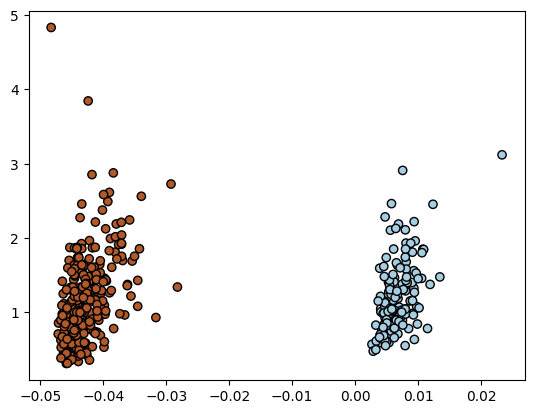

In [ ]:
print (" Info del dataset ".center(70, '-'))
print (" \nData, labels shapes: {0}, {1}".format(Data.shape, labels.shape))
print ("Nro muestras: {0}".format(Data.shape[0]))
print ("Nro caracteristicas: {0}".format(Data.shape[1]))
print ("Nro clases: {0}".format(len(np.unique(labels))))
# print ("Nombres de las clases: {0}".format(list(data.target_names)))
print ("ID de las clases: {0}\n\n".format(np.unique(labels)))

# plot la base de datos que debera procesar
plt.scatter(Data[:, 0], Data[:, 1], c=labels, edgecolors='k', cmap=plt.cm.Paired)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Data = scaler.fit_transform(Data)

**Regresión logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Ingrese el código para realizar la clasificación con los algoritmos aquí.
# Utilice cuantas celdas de código necesite

#Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit( Data , labels )


# --
# Muestre las fronteras de decisión de cada algoritmo y las metricas de desempeño


LogisticRegression()

In [ ]:
print(logistic_regression.coef_, logistic_regression.intercept_)

[[-4.50128767  0.19278104]] [1.61138341]


In [ ]:
# Min-Max values for the grid of decision boundaries
offset = 0.5
h_min, h_max = min(Data[:,0])-offset , max(Data[:,0]) + offset
v_min, v_max = min(Data[:,1])-offset , max(Data[:,1]) + offset

# Create grid
h_grid, v_grid = np.meshgrid( np.linspace(h_min, h_max, 100) , np.linspace(v_min, v_max, 100))

# Estimate predictions over the grid
pred_grid = logistic_regression.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)

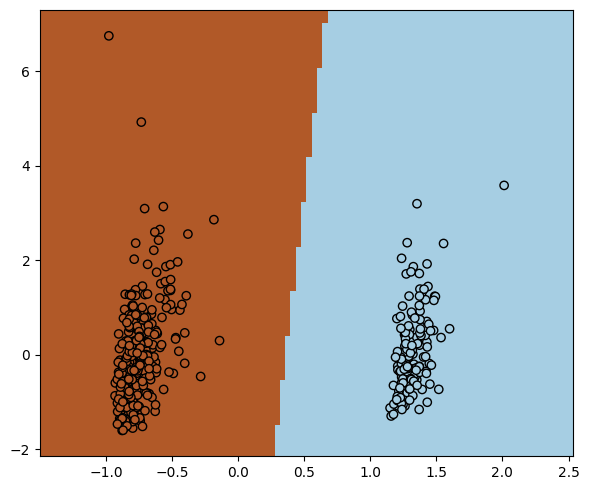

In [ ]:
# draw_grid
_, ax = plt.subplots(figsize=(6,5))

# Scatter real values
ax.pcolormesh(h_grid,v_grid,pred_grid, cmap= 'Paired')
ax.scatter(Data[:,0] , Data[:,1], c= labels, edgecolors= 'k' ,cmap= 'Paired')
plt.tight_layout()
# ax.set_xticks(())
# ax.set_yticks(())

**Clasificador KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as kNN

In [ ]:
n_neighbors = 5
knn = kNN(n_neighbors = n_neighbors, metric = "euclidean")

knn.fit( Data , labels )

KNeighborsClassifier(metric='euclidean')

In [ ]:
offset = 0.5
x_min, x_max = min(Data[:,0])-offset, max(Data[:,0]) + offset
y_min, y_max = min(Data[:,1])-offset, max(Data[:,1]) + offset

x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

pred_grid = knn.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
pred_grid = pred_grid.reshape(x_grid.shape)

print(x_grid.shape, y_grid.shape)

(100, 100) (100, 100)


[]

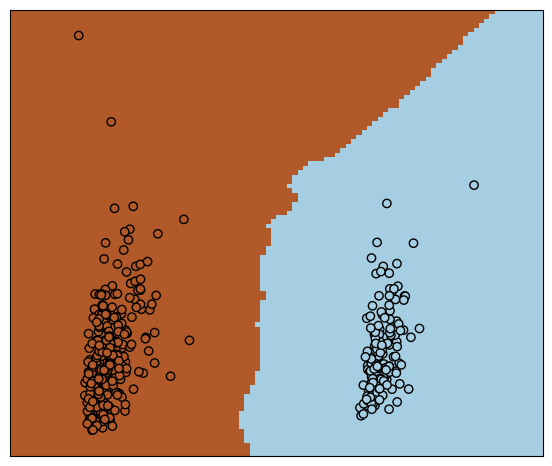

In [ ]:
# Draw grid
_, ax = plt.subplots(figsize = (6,5))

ax.pcolormesh(x_grid, y_grid, pred_grid, cmap = 'Paired')
ax.scatter(Data[:, 0], Data[:,1], c=labels, edgecolors='k', cmap='Paired')

plt.tight_layout()
ax.set_xticks(())
ax.set_yticks(())

**Clasificador SVM (kernel sigmoide)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel = 'sigmoid' )
clf.fit(Data, labels)

SVC(kernel='sigmoid')

In [ ]:
offset = 0.5

h_min, h_max = min(Data[:,0]) - offset, max(Data[:,0]) + offset
v_min, v_max = min(Data[:,1]) - offset, max(Data[:,1]) + offset

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
pred_grid = clf.decision_function( np.c_[h_grid.ravel(), v_grid.ravel()])
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape)
print (pred_grid.shape)

(10000,)
(100, 100)


[]

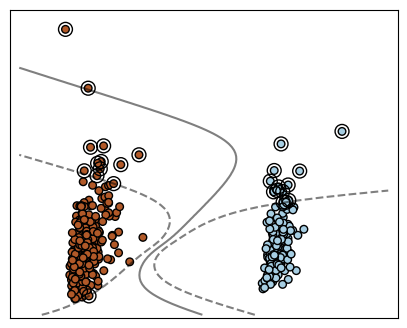

In [ ]:
_, ax = plt.subplots (figsize=(5,4))
ax.scatter( Data[:, 0] , Data[:, 1], c = labels , s = 30, edgecolors='k' ,cmap = plt.cm.Paired)

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

ax.set_xlim(h_grid.min()-.1, h_grid.max()+.1)
ax.set_ylim(v_grid.min()-.1, v_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

In [ ]:
pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)

([], [])

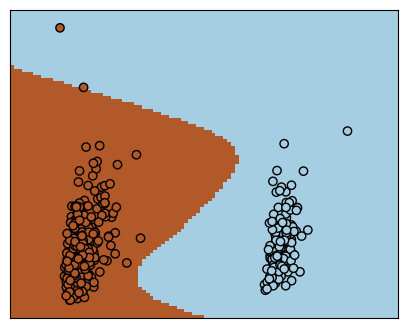

In [ ]:
_, ax = plt.subplots (figsize=(5,4))
ax.pcolormesh(h_grid, v_grid, pred_grid, cmap='Paired')
ax.scatter(Data[:,0], Data[:,1], c = labels, edgecolors='k', cmap='Paired')

ax.set_xticks([]), ax.set_yticks([])

**Clasificador SVM (kernel de base radial - rbf)**

In [ ]:
clf = SVC(kernel = 'rbf')
clf.fit(Data, labels)

SVC()

In [ ]:
offset = 0.5

h_min, h_max = min(Data[:,0]) - offset, max(Data[:,0]) + offset
v_min, v_max = min(Data[:,1]) - offset, max(Data[:,1]) + offset

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
pred_grid = clf.decision_function( np.c_[h_grid.ravel(), v_grid.ravel()])
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape)
print (pred_grid.shape)

(10000,)
(100, 100)


[]

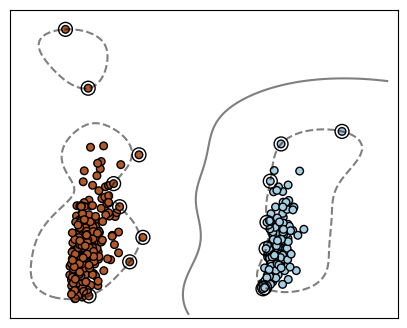

In [ ]:
_, ax = plt.subplots (figsize=(5,4))
ax.scatter( Data[:, 0] , Data[:, 1], c = labels , s = 30, edgecolors='k' ,cmap = plt.cm.Paired)

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

ax.set_xlim(h_grid.min()-.1, h_grid.max()+.1)
ax.set_ylim(v_grid.min()-.1, v_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

In [ ]:
pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)

([], [])

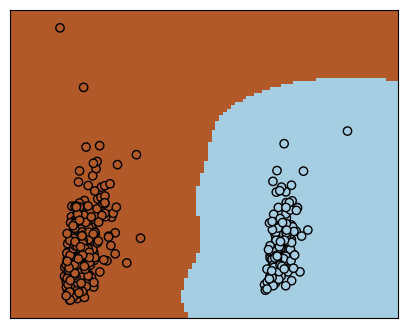

In [ ]:
_, ax = plt.subplots (figsize=(5,4))
ax.pcolormesh(h_grid, v_grid, pred_grid, cmap='Paired')
ax.scatter(Data[:,0], Data[:,1], c = labels, edgecolors='k', cmap='Paired')

ax.set_xticks([]), ax.set_yticks([])

## Ejercicio 2 - Clasificación (C = 2.0)

Implemente y compare los siguientes algoritmos de clasificación para la base de datos de ***tipos de fríjoles***, la cual contiene 4 características en total. Para el entrenamiento de los modelos listados use el subconjunto ```dry_beans_train.csv```, el cual contiene todos los datos incluídas las etiquetas. Una vez entrenados, compare el desempeño de los diferentes clasificadores calculando las fronteras de decisión en el subconjunto de datos ```dry_beans_test.csv```. Sin embargo, tenga en cuenta que para mostrar las fronteras de decisión deberá entrenar usando 2 variables, por lo que considere usar pares diferentes de variables con el fin de que pueda visualizar las fronteras correctamente (ver figura de salida en la siguiente celda). Para cada uno de los algoritmos, modifique sus parámetros de tal forma que pueda obtener el mejor desempeño en términos de las métricas, ya que los clasificadores por defecto no necesariamente darán un buen desempeño (por ejm, las ```SVM```). Al final, deberá mostrar un resultado similar pero no necesariamente igual a los de la parte inferior.

\

**Clasificadores:**
1. Clasificador SVM (kernel polinómico)
2. Clasificador SVM (sigmoide)
3. Clasificador SVM (kernel de base radial - rbf)
4. Clasificador bayes ingenuo


**NOTA:** Al ejecutar la celda, use los archivos ```dry_red_beans/dry_beans_train.csv``` y ```dry_red_beans/dry_beans_test.csv``` para resolver el trabajo

In [ ]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar Types of Beans dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/dry_red_beans```

import os
import urllib.request
_ = urllib.request.urlretrieve("https://drive.google.com/uc?id=1UFvAZBvtzYduyty22kUdFAyOxO7LIv6j", filename='/beans.zip')
os.makedirs('/content/', exist_ok=True)
!unzip -qq /beans.zip -d /content
!rm -r /beans.zip /content/__MACOSX
#@markdown ---------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as colors
import itertools

In [ ]:
# Cargar datos
train_data = pd.read_csv('dry_red_beans/dry_beans_train.csv')
test_data = pd.read_csv('dry_red_beans/dry_beans_test.csv')

In [ ]:
# Obtener características y etiquetas
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [ ]:
# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para facilitar el manejo
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# Obtener nombres de características
feature_names = X_train.columns

# Definir pares de características para visualizar
feature_pairs = [
    ('Area', 'Perimeter'),
    ('Perimeter', 'Solidity'),
    ('Solidity', 'Compactness'),
    ('Perimeter', 'Compactness')
]

# Definir modelos
models = {
    'SVM (poly)': SVC(kernel='poly', gamma='auto'),
    'SVM (sigmoid)': SVC(kernel='sigmoid', gamma='auto'),
    'SVM (rbf)': SVC(kernel='rbf', C=10, gamma=0.1),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# Función para visualizar frontera de decisión
def plot_decision_boundary(ax, model, X, y, feature_pair, title):
    # Obtener índices de las características
    feature_idx1 = list(X.columns).index(feature_pair[0])
    feature_idx2 = list(X.columns).index(feature_pair[1])

    # Obtener valores de las características
    X_pair = X.iloc[:, [feature_idx1, feature_idx2]].values

    # Entrenar modelo con el par de características
    model.fit(X_pair, y)

    # Crear malla para la frontera de decisión
    h = 0.09  # Tamaño del paso en la malla
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    X_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir en la malla
    Prediction = model.predict(np.c_[X_grid.ravel(), y_grid.ravel()])
    Prediction = Prediction.reshape(X_grid.shape)

    # Dibujar frontera de decisión
    cmapC = "rainbow"
    ax.contourf(X_grid, y_grid, Prediction, alpha=0.3, cmap=cmapC)

    # Dibujar puntos de datos
    scatter = ax.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap=cmapC, edgecolor='k', s=20)

    # Etiquetas
    ax.set_xlabel(feature_pair[0])
    ax.set_ylabel(feature_pair[1])
    ax.set_title(title)

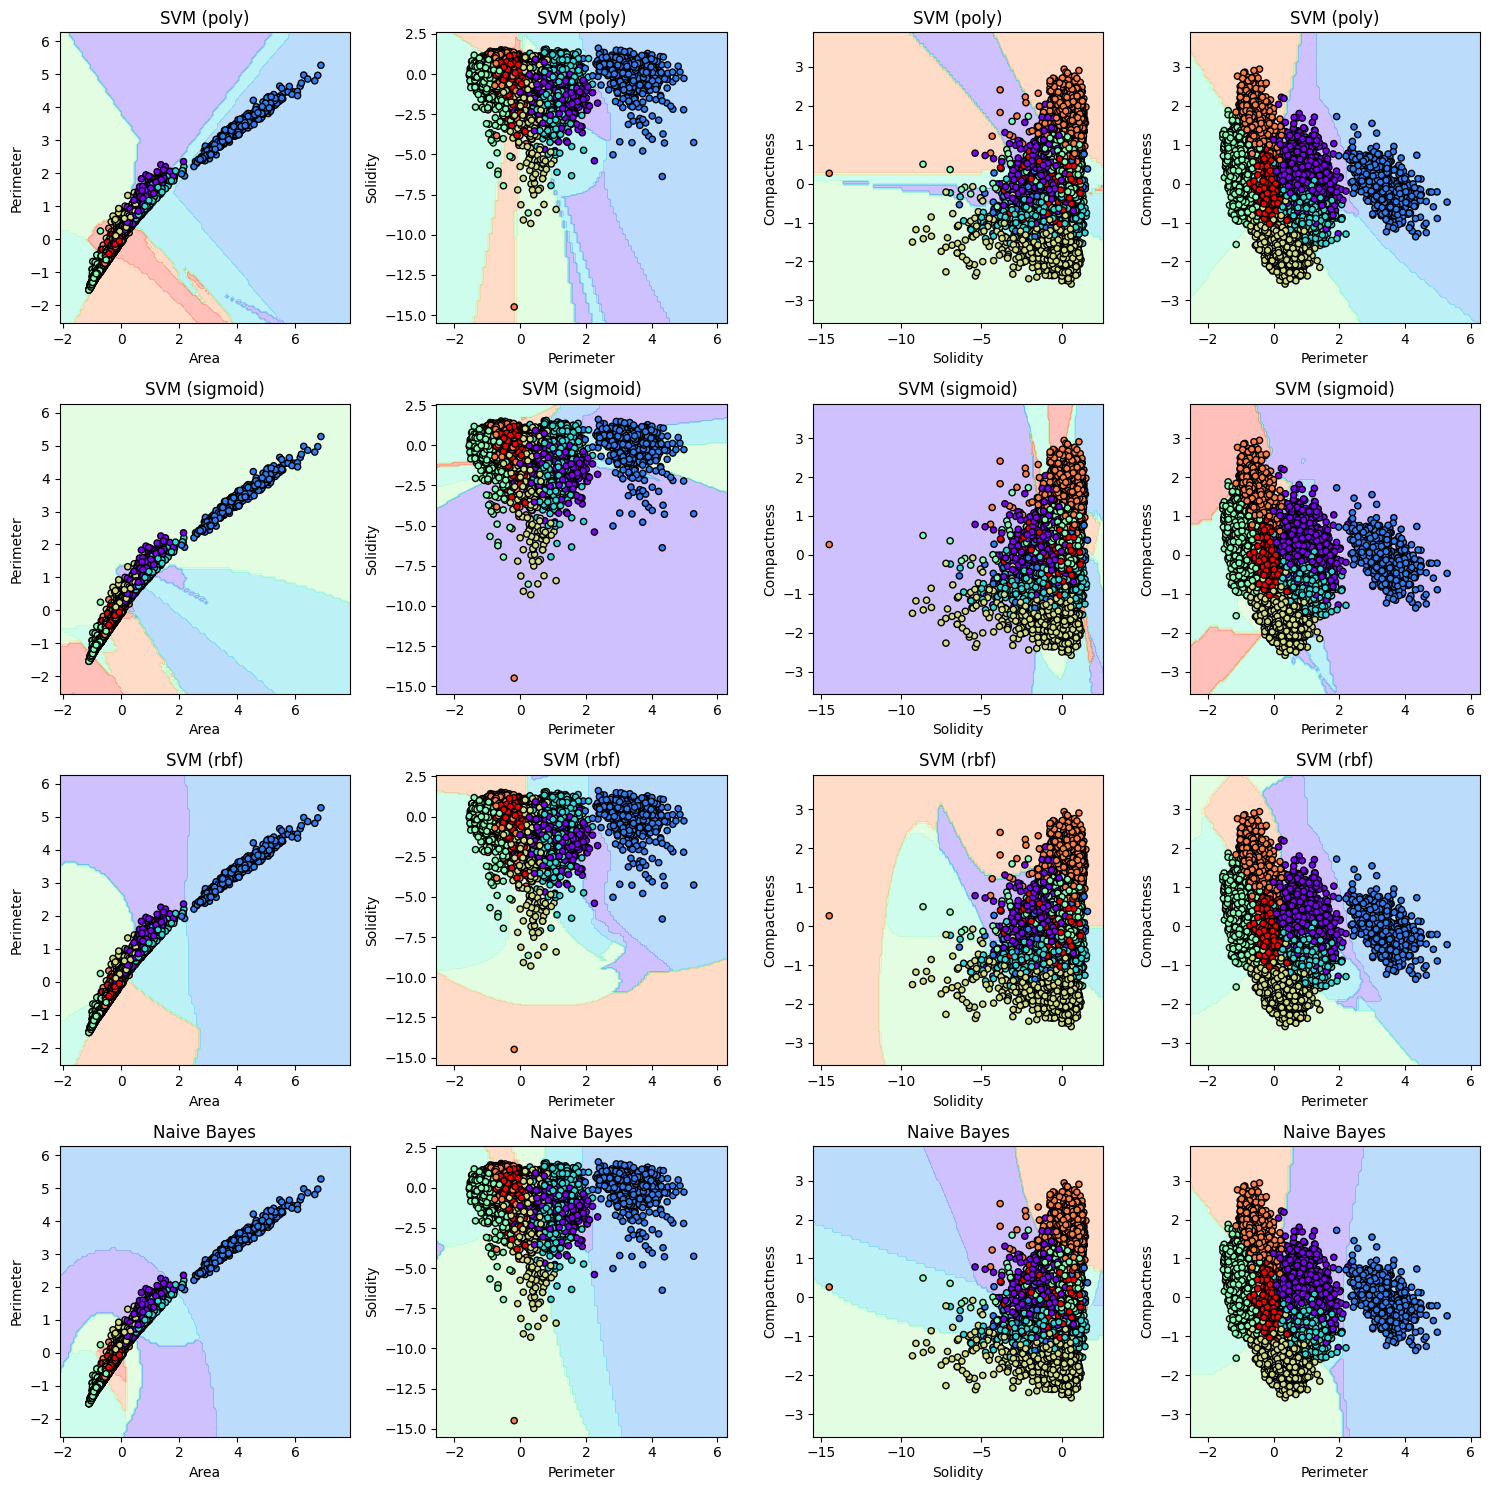

In [ ]:
# Crear una figura para mostrar todas las fronteras de decisión
plt.figure(figsize=(15, 15))

# Visualizar fronteras de decisión para cada modelo y par de características
row = 0
accuracies = {}

for model_name, model in models.items():
    accuracies[model_name] = []

    for i, feature_pair in enumerate(feature_pairs):
        # Crear subgráfico
        ax = plt.subplot(len(models), len(feature_pairs), row * len(feature_pairs) + i + 1)

        # Dibujar frontera de decisión
        accuracy = plot_decision_boundary(
            ax, model,
            X_train_scaled_df, y_train,
            feature_pair,
            f"{model_name}"
        )
        accuracies[model_name].append(accuracy)

    row += 1

plt.tight_layout()
plt.show()

## Ejercicio 3 - Regresión (C = 1.0)

Implemente una regresión lineal y una máquina de soporte de regresión para entrenar sobre los datos en ```train_data``` y ```train_targets```. Además, calcule el ```MAE``` y el ```MSE``` e imprímalos sobre los datos en ```test_data``` y ```test_targets```. Por último, dibuje la línea de la regresión en color verde. Deberá mostrar un resultado similar pero no necesariamente igual al de la figura de la parte inferior.

**NOTA:** Los datos se generarán de acuerdo a su número se CC. \\


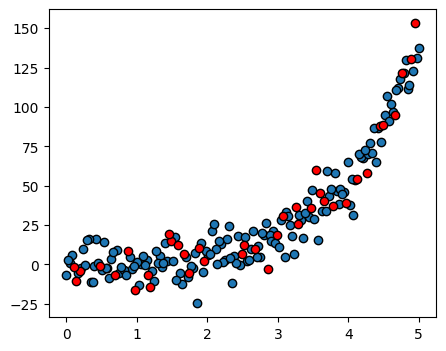

In [ ]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1kAjFkk0x0m85nPzR-1LSpWgGMr2NkH82" -O /eval_tools-1.4-py3-none-any.whl
!pip3 -qq install /eval_tools-1.4-py3-none-any.whl
!rm -r /eval_tools-1.4-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import load_regression_from_CC

CC = 1020102262 #@param {type:"number"}

train_data, test_data, train_targets, test_targets = load_regression_from_CC (CC)

_, axes = plt.subplots(figsize=(5,4))
axes.scatter(train_data, train_targets, edgecolors='k');
axes.scatter(test_data, test_targets, edgecolors='k', c = "r");

#@markdown ------

Check variables ```train_data, test_data, train_targets``` and ```test_targets```

In [ ]:
print (train_data.shape, train_targets.shape, test_data.shape, test_targets.shape)

(152,) (152,) (38,) (38,)


# Regresión Lineal

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Ingrese el código aquí.
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit( train_data.reshape(-1, 1) , train_targets )

print ("w = " + str(linear_regression.coef_) + ", b = " + str(linear_regression.intercept_))

w = [21.28307583], b = -25.777232219880688


MAE: 17.17875423484423
MSE: 488.97987429073316


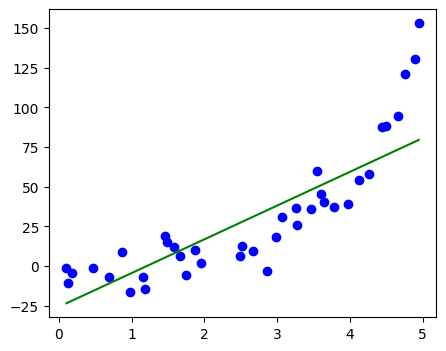

In [ ]:
# Predicciones en el conjunto de prueba
predictions = linear_regression.predict(test_data.reshape(-1,1))

# Ordenar los datos de prueba y las predicciones correspondientes
sorted_indices = np.argsort(test_data.flatten())
test_data_sorted = test_data[sorted_indices]
predictions_sorted = predictions[sorted_indices]


pred_lr = linear_regression.predict(test_data.reshape(-1,1))

# Cálculo de MAE (Error absoluto medio)
mae_lr = np.mean(np.abs(test_targets - pred_lr))

# Cálculo de MSE (Error cuadrático medio)
mse_lr = np.mean((test_targets - pred_lr) ** 2)

print("MAE: {0}".format(mae_lr))
print("MSE: {0}".format(mse_lr))

_, ax = plt.subplots (figsize = ( 5 , 4 ))
ax.scatter( test_data , test_targets , color = 'blue')
ax.plot( test_data_sorted, predictions_sorted , color = 'green')

#Máquina de soporte de regresión

In [ ]:
from sklearn.svm import SVR
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

svr = SVR(kernel = 'poly')
svr.fit( train_data , train_targets )

SVR(kernel='poly')

MAE: 9.180666833337433
MSE: 140.2751913217795


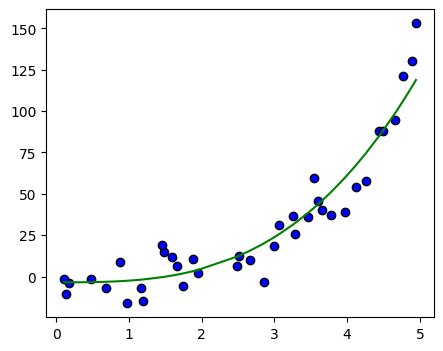

In [ ]:
# Predicciones en el conjunto de prueba
predictions = svr.predict( test_data.reshape(-1, 1) )

# Cálculo de MAE (Error absoluto medio)
mae_svr = np.mean(np.abs(test_targets - predictions))

# Cálculo de MSE (Error cuadrático medio)
mse_svr = np.mean((test_targets - predictions) ** 2)

print("MAE: {0}".format(mae_svr))
print("MSE: {0}".format(mse_svr))

# Ordenar los datos de prueba y las predicciones correspondientes
sorted_indices = np.argsort(test_data.flatten())
test_data_sorted = test_data[sorted_indices]
predictions_sorted = predictions[sorted_indices]

_, ax = plt.subplots(figsize=(5, 4))
ax.scatter(test_data, test_targets, color='blue', edgecolors='k')
ax.plot(test_data_sorted, predictions_sorted, color='green')